In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
url = "https://datascience.quantecon.org/assets/data/bball.csv"
bball = pd.read_csv(url)
bball.info()

bball

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      9 non-null      int64  
 1   Player    9 non-null      object 
 2   Team      9 non-null      object 
 3   TeamName  9 non-null      object 
 4   Games     9 non-null      int64  
 5   Pts       9 non-null      float64
 6   Assist    9 non-null      float64
 7   Rebound   9 non-null      float64
dtypes: float64(3), int64(2), object(3)
memory usage: 708.0+ bytes


,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


In [3]:
bball_long = bball.melt(id_vars=["Year", "Player", "Team", "TeamName"])

bball_long

,Year,Player,Team,TeamName,variable,value
0,2015,Curry,GSW,Warriors,Games,79.0
1,2016,Curry,GSW,Warriors,Games,79.0
2,2017,Curry,GSW,Warriors,Games,51.0
3,2015,Durant,OKC,Thunder,Games,72.0
4,2016,Durant,GSW,Warriors,Games,62.0
5,2017,Durant,GSW,Warriors,Games,68.0
6,2015,Ibaka,OKC,Thunder,Games,78.0
7,2016,Ibaka,ORL,Magic,Games,56.0
8,2016,Ibaka,TOR,Raptors,Games,23.0
9,2015,Curry,GSW,Warriors,Pts,30.1


In [4]:
bball_wide = bball_long.pivot_table(
    index="Year",
    columns=["Player", "variable", "Team"],
    values="value"
)
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

In [5]:
bball2 = bball.set_index(["Player", "Year"])
bball2.head()

Team  TeamName  Games   Pts  Assist  Rebound
Player Year                                             
Curry  2015  GSW  Warriors     79  30.1     6.7      5.4
       2016  GSW  Warriors     79  25.3     6.6      4.5
       2017  GSW  Warriors     51  26.4     6.1      5.1
Durant 2015  OKC   Thunder     72  28.2     5.0      8.2
       2016  GSW  Warriors     62  25.1     4.8      8.3

In [6]:
bball3 = bball2.T
bball3.head()

Player       Curry                       Durant                        Ibaka  \
Year          2015      2016      2017     2015      2016      2017     2015   
Team           GSW       GSW       GSW      OKC       GSW       GSW      OKC   
TeamName  Warriors  Warriors  Warriors  Thunder  Warriors  Warriors  Thunder   
Games           79        79        51       72        62        68       78   
Pts           30.1      25.3      26.4     28.2      25.1      26.4     12.6   
Assist         6.7       6.6       6.1      5.0       4.8       5.4      0.8   

Player                    
Year       2016     2016  
Team        ORL      TOR  
TeamName  Magic  Raptors  
Games        56       23  
Pts        15.1     14.2  
Assist      1.1      0.7

In [7]:
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

In [8]:
bball_wide.stack()

Player     Curry                     Durant                      Ibaka        \
variable  Assist Games   Pts Rebound Assist Games   Pts Rebound Assist Games   
Year Team                                                                      
2015 GSW     6.7  79.0  30.1     5.4    NaN   NaN   NaN     NaN    NaN   NaN   
     OKC     NaN   NaN   NaN     NaN    5.0  72.0  28.2     8.2    0.8  78.0   
2016 GSW     6.6  79.0  25.3     4.5    4.8  62.0  25.1     8.3    NaN   NaN   
     ORL     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    1.1  56.0   
     TOR     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    0.7  23.0   
2017 GSW     6.1  51.0  26.4     5.1    5.4  68.0  26.4     6.8    NaN   NaN   

Player                   
variable    Pts Rebound  
Year Team                
2015 GSW    NaN     NaN  
     OKC   12.6     6.8  
2016 GSW    NaN     NaN  
     ORL   15.1     6.8  
     TOR   14.2     6.8  
2017 GSW    NaN     NaN

In [9]:
player_stats = bball_wide.stack().mean()
player_stats

Player  variable
Curry   Assist       6.466667
        Games       69.666667
        Pts         27.266667
        Rebound      5.000000
Durant  Assist       5.066667
        Games       67.333333
        Pts         26.566667
        Rebound      7.766667
Ibaka   Assist       0.866667
        Games       52.333333
        Pts         13.966667
        Rebound      6.800000
dtype: float64

In [10]:
bball_wide.stack(level="Player")

variable    Assist                Games                     Pts              \
Team           GSW  OKC  ORL  TOR   GSW   OKC   ORL   TOR   GSW   OKC   ORL   
Year Player                                                                   
2015 Curry     6.7  NaN  NaN  NaN  79.0   NaN   NaN   NaN  30.1   NaN   NaN   
     Durant    NaN  5.0  NaN  NaN   NaN  72.0   NaN   NaN   NaN  28.2   NaN   
     Ibaka     NaN  0.8  NaN  NaN   NaN  78.0   NaN   NaN   NaN  12.6   NaN   
2016 Curry     6.6  NaN  NaN  NaN  79.0   NaN   NaN   NaN  25.3   NaN   NaN   
     Durant    4.8  NaN  NaN  NaN  62.0   NaN   NaN   NaN  25.1   NaN   NaN   
     Ibaka     NaN  NaN  1.1  0.7   NaN   NaN  56.0  23.0   NaN   NaN  15.1   
2017 Curry     6.1  NaN  NaN  NaN  51.0   NaN   NaN   NaN  26.4   NaN   NaN   
     Durant    5.4  NaN  NaN  NaN  68.0   NaN   NaN   NaN  26.4   NaN   NaN   

variable          Rebound                 
Team          TOR     GSW  OKC  ORL  TOR  
Year Player                               
2015 Curry    NaN     5.4  NaN  NaN  NaN  
     Durant   NaN     NaN  8.2  NaN  NaN  
     Ibaka    NaN     NaN  6.8  NaN  NaN  
2016 Curry    NaN     4.5  NaN  NaN  NaN  
     Durant   NaN     8.3  NaN  NaN  NaN  
     Ibaka   14.2     NaN  NaN  6.8  6.8  
2017 Curry    NaN     5.1  NaN  NaN  NaN  
     Durant   NaN     6.8  NaN  NaN  NaN

In [11]:
bball_wide.stack(level="Player").mean()

variable  Team
Assist    GSW      5.92
          OKC      2.90
          ORL      1.10
          TOR      0.70
Games     GSW     67.80
          OKC     75.00
          ORL     56.00
          TOR     23.00
Pts       GSW     26.66
          OKC     20.40
          ORL     15.10
          TOR     14.20
Rebound   GSW      6.02
          OKC      7.50
          ORL      6.80
          TOR      6.80
dtype: float64

In [12]:
bball_wide.stack(level=["Player", "Team"])

variable          Assist  Games   Pts  Rebound
Year Player Team                              
2015 Curry  GSW      6.7   79.0  30.1      5.4
     Durant OKC      5.0   72.0  28.2      8.2
     Ibaka  OKC      0.8   78.0  12.6      6.8
2016 Curry  GSW      6.6   79.0  25.3      4.5
     Durant GSW      4.8   62.0  25.1      8.3
     Ibaka  ORL      1.1   56.0  15.1      6.8
            TOR      0.7   23.0  14.2      6.8
2017 Curry  GSW      6.1   51.0  26.4      5.1
     Durant GSW      5.4   68.0  26.4      6.8

In [13]:
player_stats

Player  variable
Curry   Assist       6.466667
        Games       69.666667
        Pts         27.266667
        Rebound      5.000000
Durant  Assist       5.066667
        Games       67.333333
        Pts         26.566667
        Rebound      7.766667
Ibaka   Assist       0.866667
        Games       52.333333
        Pts         13.966667
        Rebound      6.800000
dtype: float64

In [14]:
player_stats.unstack()

variable,Assist,Games,Pts,Rebound
Player,,,,
Curry,6.466667,69.666667,27.266667,5.000000
Durant,5.066667,67.333333,26.566667,7.766667
Ibaka,0.866667,52.333333,13.966667,6.800000


<Axes: xlabel='Player'>

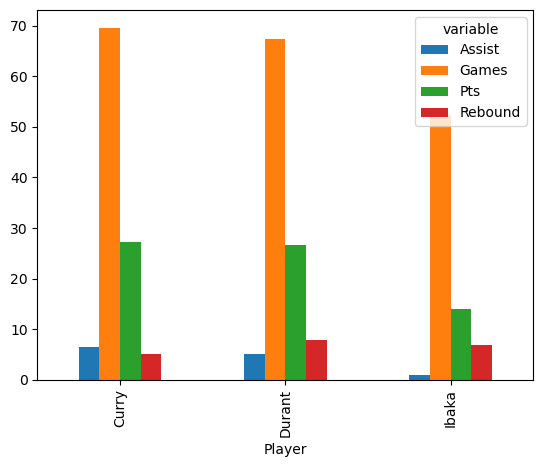

In [15]:
player_stats.unstack().plot.bar()

In [16]:
player_stats.unstack(level="Player")

Player,Curry,Durant,Ibaka
variable,,,
Assist,6.466667,5.066667,0.866667
Games,69.666667,67.333333,52.333333
Pts,27.266667,26.566667,13.966667
Rebound,5.000000,7.766667,6.800000


In [17]:
#Exercise 1
bball.drop("TeamName", axis=1).set_index(["Year", "Player", "Team"]).stack().unstack(level=[1, 3, 2]).sort_index(axis=1)`

SyntaxError: invalid syntax (2964872612.py, line 2)

In [18]:
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

In [19]:
bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


In [20]:
bball.melt(id_vars=["Year", "Player", "Team", "TeamName"])

,Year,Player,Team,TeamName,variable,value
0,2015,Curry,GSW,Warriors,Games,79.0
1,2016,Curry,GSW,Warriors,Games,79.0
2,2017,Curry,GSW,Warriors,Games,51.0
3,2015,Durant,OKC,Thunder,Games,72.0
4,2016,Durant,GSW,Warriors,Games,62.0
5,2017,Durant,GSW,Warriors,Games,68.0
6,2015,Ibaka,OKC,Thunder,Games,78.0
7,2016,Ibaka,ORL,Magic,Games,56.0
8,2016,Ibaka,TOR,Raptors,Games,23.0
9,2015,Curry,GSW,Warriors,Pts,30.1


In [22]:
#Exercise 2 
bball.melt(id_vars=["Year", "Player"]) 

,Year,Player,variable,value
0,2015,Curry,Team,GSW
1,2016,Curry,Team,GSW
2,2017,Curry,Team,GSW
3,2015,Durant,Team,OKC
4,2016,Durant,Team,GSW
5,2017,Durant,Team,GSW
6,2015,Ibaka,Team,OKC
7,2016,Ibaka,Team,ORL
8,2016,Ibaka,Team,TOR
9,2015,Curry,TeamName,Warriors


In [23]:
bball.melt(id_vars=["Year", "Player", "Team", "TeamName"]

SyntaxError: incomplete input (3202321556.py, line 1)

In [24]:
value_vars

NameError: name 'value_vars' is not defined

In [25]:
bball.melt(id_vars=["Year", "Player"], value_vars=["Pts", "Rebound"]

SyntaxError: incomplete input (920513692.py, line 1)

In [26]:
bball.stack 

<bound method DataFrame.stack of    Year  Player Team  TeamName  Games   Pts  Assist  Rebound
0  2015   Curry  GSW  Warriors     79  30.1     6.7      5.4
1  2016   Curry  GSW  Warriors     79  25.3     6.6      4.5
2  2017   Curry  GSW  Warriors     51  26.4     6.1      5.1
3  2015  Durant  OKC   Thunder     72  28.2     5.0      8.2
4  2016  Durant  GSW  Warriors     62  25.1     4.8      8.3
5  2017  Durant  GSW  Warriors     68  26.4     5.4      6.8
6  2015   Ibaka  OKC   Thunder     78  12.6     0.8      6.8
7  2016   Ibaka  ORL     Magic     56  15.1     1.1      6.8
8  2016   Ibaka  TOR   Raptors     23  14.2     0.7      6.8>

In [27]:
bball.melt

<bound method DataFrame.melt of    Year  Player Team  TeamName  Games   Pts  Assist  Rebound
0  2015   Curry  GSW  Warriors     79  30.1     6.7      5.4
1  2016   Curry  GSW  Warriors     79  25.3     6.6      4.5
2  2017   Curry  GSW  Warriors     51  26.4     6.1      5.1
3  2015  Durant  OKC   Thunder     72  28.2     5.0      8.2
4  2016  Durant  GSW  Warriors     62  25.1     4.8      8.3
5  2017  Durant  GSW  Warriors     68  26.4     5.4      6.8
6  2015   Ibaka  OKC   Thunder     78  12.6     0.8      6.8
7  2016   Ibaka  ORL     Magic     56  15.1     1.1      6.8
8  2016   Ibaka  TOR   Raptors     23  14.2     0.7      6.8>

In [28]:
#I wasn't sure if some of those codes were going to work. It doesn't look like they did. 

In [29]:
bball.head(6).pivot(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


In [30]:
bball.head(6).set_index(["Year", "Player"])["Pts"].unstack(level="Player")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


In [31]:
bball.pivot(index="Year", columns="Player", values="Pts")

ValueError: Index contains duplicate entries, cannot reshape

In [32]:
bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


In [33]:
bball.head(6).pivot_table(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


In [34]:
bball.pivot_table(index=["Year", "Team"], columns="Player", values="Pts")

Player     Curry  Durant  Ibaka
Year Team                      
2015 GSW    30.1     NaN    NaN
     OKC     NaN    28.2   12.6
2016 GSW    25.3    25.1    NaN
     ORL     NaN     NaN   15.1
     TOR     NaN     NaN   14.2
2017 GSW    26.4    26.4    NaN

In [35]:
bball.pivot_table(index="Year", columns=["Player", "Team"], values="Pts")

Player Curry Durant       Ibaka            
Team     GSW    GSW   OKC   OKC   ORL   TOR
Year                                       
2015    30.1    NaN  28.2  12.6   NaN   NaN
2016    25.3   25.1   NaN   NaN  15.1  14.2
2017    26.4   26.4   NaN   NaN   NaN   NaN

In [36]:
bball_pivoted = bball.pivot_table(index="Year", columns="Player", values="Pts")
bball_pivoted

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.60
2016,25.3,25.1,14.65
2017,26.4,26.4,NaN


In [37]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=max)

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.6
2016,25.3,25.1,15.1
2017,26.4,26.4,NaN


In [51]:
#Exercise 3
#Using pivot would be a fast way to interpret data just less accurate. 
bball.pivot_table(index="Player", columns="TeamName", values="Rebound Assist", aggfunc=[np.max, np.min, len])

KeyError: 'Rebound Assist'

In [40]:
df = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": "x y x z".split(),
    "C": [1, 2, 1, 4],
    "D": [10, 20, 30, 20,],
    "E": [2, 1, 5, 4,]
})

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      int64 
 1   B       4 non-null      object
 2   C       4 non-null      int64 
 3   D       4 non-null      int64 
 4   E       4 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 292.0+ bytes


,A,B,C,D,E
0,0,x,1,10,2
1,0,y,2,20,1
2,1,x,1,30,5
3,1,z,4,20,4


In [38]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=len)

Player,Curry,Durant,Ibaka
Year,,,
2015,1.0,1.0,1.0
2016,1.0,1.0,2.0
2017,1.0,1.0,NaN


In [39]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=[max, len])

max                len             
Player Curry Durant Ibaka Curry Durant Ibaka
Year                                        
2015    30.1   28.2  12.6   1.0    1.0   1.0
2016    25.3   25.1  15.1   1.0    1.0   2.0
2017    26.4   26.4   NaN   1.0    1.0   NaN

In [41]:
df2 = df.set_index(["A", "B"])
df2.head()

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [42]:
df3 = df2.T
df3.head()

A   0       1    
B   x   y   x   z
C   1   2   1   4
D  10  20  30  20
E   2   1   5   4

In [43]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [44]:
df2_stack = df2.stack()
df2_stack

A  B   
0  x  C     1
      D    10
      E     2
   y  C     2
      D    20
      E     1
1  x  C     1
      D    30
      E     5
   z  C     4
      D    20
      E     4
dtype: int64

In [45]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [46]:
df2.unstack()

C               D                E          
B    x    y    z     x     y     z    x    y    z
A                                                
0  1.0  2.0  NaN  10.0  20.0   NaN  2.0  1.0  NaN
1  1.0  NaN  4.0  30.0   NaN  20.0  5.0  NaN  4.0

In [47]:
df

,A,B,C,D,E
0,0,x,1,10,2
1,0,y,2,20,1
2,1,x,1,30,5
3,1,z,4,20,4


In [48]:
df_melted = df.melt(id_vars=["A", "B"])
df_melted

,A,B,variable,value
0,0,x,C,1
1,0,y,C,2
2,1,x,C,1
3,1,z,C,4
4,0,x,D,10
5,0,y,D,20
6,1,x,D,30
7,1,z,D,20
8,0,x,E,2
9,0,y,E,1


In [1]:
import pandas as pd
%matplotlib inline

from IPython.display import display

In [2]:
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
wdi = pd.read_csv(url).set_index(["country", "year"])
wdi.info()

wdi2017 = wdi.xs(2017, level="year")
wdi2017

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Canada', 2017) to ('United States', 2000)
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GovExpend    72 non-null     float64
 1   Consumption  72 non-null     float64
 2   Exports      72 non-null     float64
 3   Imports      72 non-null     float64
 4   GDP          72 non-null     float64
dtypes: float64(5)
memory usage: 3.9+ KB


,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [3]:
wdi2016_17 = wdi.loc[pd.IndexSlice[:, [2016, 2017]],: ]
wdi2016_17

,,GovExpend,Consumption,Exports,Imports,GDP
country,year,,,,,
Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016
Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859
United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241
United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348
Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627


In [4]:
sq_miles = pd.Series({
   "United States": 3.8,
   "Canada": 3.8,
   "Germany": 0.137,
   "United Kingdom": 0.0936,
   "Russia": 6.6,
}, name="sq_miles").to_frame()
sq_miles.index.name = "country"
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [5]:
pop_url = "https://datascience.quantecon.org/assets/data/wdi_population.csv"
pop = pd.read_csv(pop_url).set_index(["country", "year"])
pop.info()
pop.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Canada', 2017) to ('United States', 2000)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  72 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


Population
country year            
Canada  2017   36.540268
        2016   36.109487
        2015   35.702908
        2014   35.437435
        2013   35.082954
        2012   34.714222
        2011   34.339328
        2010   34.004889
        2009   33.628895
        2008   33.247118

In [6]:
pd.concat([wdi2017, sq_miles], axis=0)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,NaN
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,NaN
United States,2.405743,12.019266,2.287071,3.069954,17.348627,NaN
United States,NaN,NaN,NaN,NaN,NaN,3.8000
Canada,NaN,NaN,NaN,NaN,NaN,3.8000
Germany,NaN,NaN,NaN,NaN,NaN,0.1370
United Kingdom,NaN,NaN,NaN,NaN,NaN,0.0936
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [7]:
pd.concat([wdi2017, sq_miles], axis=1)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [8]:
temp = pd.concat([wdi2017, sq_miles], axis=1)
temp["Consumption"] / temp["sq_miles"]

country
Canada             0.288283
Germany           15.416124
United Kingdom    19.328569
United States      3.162965
Russia                  NaN
dtype: float64

In [9]:
pd.merge(wdi2017, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [10]:
pd.merge(wdi2016_17, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.364899,1.058426,0.576394,0.575775,1.814016,3.8000
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.734014,2.075615,1.844949,1.589495,3.801859,0.1370
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.550596,1.772348,0.816792,0.901494,2.768241,0.0936
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.407981,11.722133,2.219937,2.936004,16.972348,3.8000
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [11]:
pd.merge(wdi2016_17.reset_index(), sq_miles, on="country")

,country,year,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
0,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,3.8000
1,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
2,Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859,0.1370
3,Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
4,United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241,0.0936
5,United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
6,United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348,3.8000
7,United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [12]:
pd.merge(wdi2016_17, pop, on=["country", "year"])

,,GovExpend,Consumption,Exports,Imports,GDP,Population
country,year,,,,,,
Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,36.109487
Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859,82.348669
United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241,65.595565
United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348,323.071342
Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,36.540268
Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870,82.657002
United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704,66.058859
United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627,325.147121


In [13]:
wdi_pop = pd.merge(wdi2016_17, pop, on=["country", "year"])
wdi_pop["GDP"] / wdi_pop["Population"]


country         year
Canada          2016    0.050237
Germany         2016    0.046168
United Kingdom  2016    0.042202
United States   2016    0.052534
Canada          2017    0.051126
Germany         2017    0.046988
United Kingdom  2017    0.042670
United States   2017    0.053356
dtype: float64

In [14]:
wdi_pop["Consumption"] / wdi_pop["Population"]

country         year
Canada          2016    0.029312
Germany         2016    0.025205
United Kingdom  2016    0.027019
United States   2016    0.036283
Canada          2017    0.029980
Germany         2017    0.025551
United Kingdom  2017    0.027387
United States   2017    0.036966
dtype: float64

In [15]:
#Exercise 1 
 wdi_pop["Population"]

IndentationError: unexpected indent (1403391763.py, line 2)

In [17]:
pd.merge(wdi2017, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [18]:
pd.merge(wdi2017.reset_index(), sq_miles.reset_index())

,country,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
0,Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
1,Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
2,United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
3,United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [19]:
pd.merge(wdi2017, sq_miles, left_on="country", right_on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [20]:
pd.merge(wdi2017, sq_miles, left_on="country", right_index=True)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [21]:
wdi2017_no_US = wdi2017.drop("United States")
wdi2017_no_US

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704


In [22]:
sq_miles_no_germany = sq_miles.drop("Germany")
sq_miles_no_germany

,sq_miles
country,
United States,3.8000
Canada,3.8000
United Kingdom,0.0936
Russia,6.6000


In [23]:
pd.merge(wdi2017, sq_miles, on="country", how="left")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [24]:
pd.merge(wdi2017, sq_miles, on="country", how="right")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [25]:
pd.merge(wdi2017_no_US, sq_miles, on="country", how="inner")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936


In [26]:
pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="outer")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,NaN,NaN,NaN,NaN,NaN,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [27]:
#Exercise 2 
pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="left")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936


In [28]:
#Exercise 3 
pd.merge(wdi2017, sq_miles, how="left")

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [29]:
pd.merge(sq_miles, wdi2017, how=XXX)

NameError: name 'XXX' is not defined

In [30]:
wdi2017.merge(sq_miles, on="country", how="right")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [31]:
wdi2017.join(sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [32]:
wdi2017.merge(sq_miles, left_on="country", right_index=True)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [33]:
url = "https://datascience.quantecon.org/assets/data/goodreads_ratings.csv.zip"
ratings = pd.read_csv(url)
display(ratings.head())
ratings.info()

,Unnamed: 0,user_id,book_id,rating
0,0,1,258,5
1,1,2,4081,4
2,2,2,260,5
3,3,2,9296,5
4,4,2,2318,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 4 columns):
 #   Column      Dtype
---  ------      -----
 0   Unnamed: 0  int64
 1   user_id     int64
 2   book_id     int64
 3   rating      int64
dtypes: int64(4)
memory usage: 182.4 MB


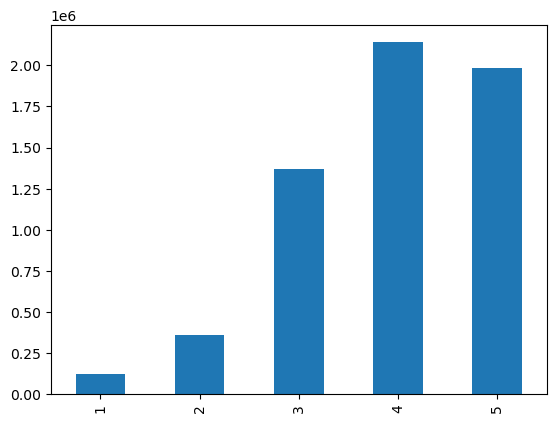

In [34]:
ratings["rating"].value_counts().sort_index().plot(kind="bar");

In [36]:
users_by_n = (
    ratings["user_id"]
    .value_counts()  
    .value_counts()  
    .sort_index()   
    .reset_index()  
    .rename(columns={"index": "N_ratings", "user_id": "N_users"})
)
users_by_n.head(10)

,N_ratings,N_users
0,19,1
1,20,1
2,21,3
3,22,13
4,23,5
5,24,11
6,25,13
7,26,23
8,27,34
9,28,26


In [37]:
users_by_n.describe()

,N_ratings,N_users
count,181.00000,181.000000
mean,109.01105,295.160221
std,52.41342,309.461848
min,19.00000,1.000000
25%,64.00000,40.000000
50%,109.00000,158.000000
75%,154.00000,538.000000
max,200.00000,964.000000


N_ratings       Axes(0.125,0.11;0.352273x0.77)
N_users      Axes(0.547727,0.11;0.352273x0.77)
dtype: object

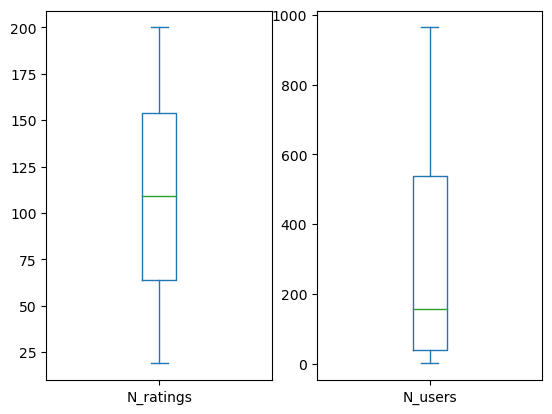

In [38]:
users_by_n.plot(kind="box", subplots=True)

In [39]:
n_ratings = ratings["user_id"].value_counts()
n_ratings.head()

12874    200
30944    200
52036    199
12381    199
28158    199
Name: user_id, dtype: int64

In [40]:
N = 5
most_prolific_users = n_ratings.nlargest(5).index.tolist()
least_prolific_users = n_ratings.nsmallest(5).index.tolist()

In [46]:
active_ratings = ratings.loc[ratings["user_id"].isin(most_prolific_users), :]
inactive_ratings = ratings.loc[ratings["user_id"].isin(least_prolific_users), :]

<Axes: title={'center': 'Distribution of ratings by most active users'}>

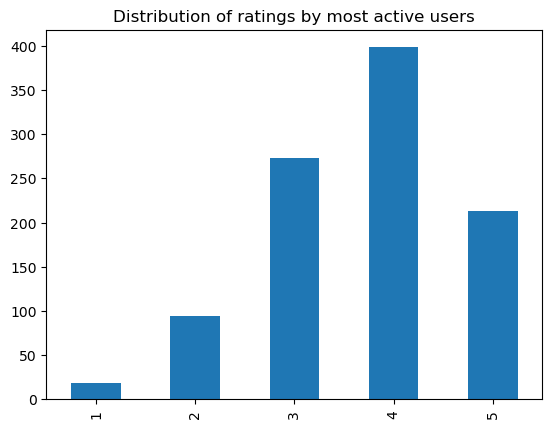

In [47]:
active_ratings["rating"].value_counts().sort_index().plot(
    kind="bar", title="Distribution of ratings by most active users"
)

<Axes: title={'center': 'Distribution of ratings by least active users'}>

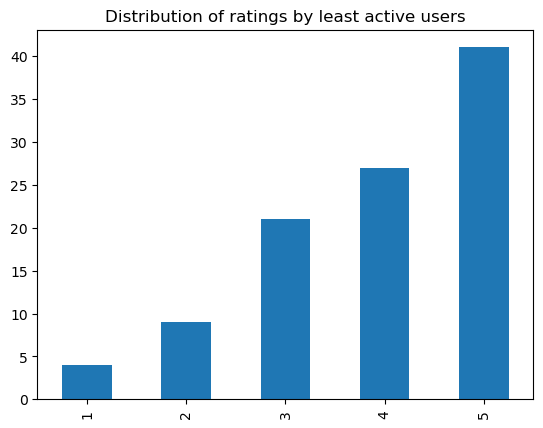

In [48]:
inactive_ratings["rating"].value_counts().sort_index().plot(
    kind="bar", title="Distribution of ratings by least active users"
)

In [49]:
url = "https://datascience.quantecon.org/assets/data/goodreads_books.csv"
books = pd.read_csv(url)
books = books[["book_id", "authors", "title"]]
print("shape: ", books.shape)
print("dtypes:\n", books.dtypes, sep="")
books.head()

shape:  (10000, 3)
dtypes:
book_id     int64
authors    object
title      object
dtype: object


,book_id,authors,title
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)"
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
2,3,Stephenie Meyer,"Twilight (Twilight, #1)"
3,4,Harper Lee,To Kill a Mockingbird
4,5,F. Scott Fitzgerald,The Great Gatsby


In [50]:
rated_books = pd.merge(ratings, books)

In [51]:
most_rated_books_id = rated_books["book_id"].value_counts().nlargest(10).index
most_rated_books = rated_books.loc[rated_books["book_id"].isin(most_rated_books_id), :]
list(most_rated_books["title"].unique())

['Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
 'The Great Gatsby',
 'To Kill a Mockingbird',
 'The Hobbit',
 'Twilight (Twilight, #1)',
 'The Hunger Games (The Hunger Games, #1)',
 'Catching Fire (The Hunger Games, #2)',
 'Mockingjay (The Hunger Games, #3)']

In [52]:
most_rated_books.pivot_table(values="rating", index="title")

,rating
title,
"Catching Fire (The Hunger Games, #2)",4.133422
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4.229418
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.418732
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.351350
"Mockingjay (The Hunger Games, #3)",3.853131
The Great Gatsby,3.772224
The Hobbit,4.148477
"The Hunger Games (The Hunger Games, #1)",4.279707
To Kill a Mockingbird,4.329369


In [53]:
#Exercise 4 
#Yes I did notice a differene in the data. One is more detailed than the other. 
#Yes, I recognize the books. 

In [54]:
average_ratings = (
    rated_books
    .pivot_table(values="rating", index="title")
    .sort_values(by="rating", ascending=False)
)
average_ratings.head(10)

,rating
title,
The Complete Calvin and Hobbes,4.829876
ESV Study Bible,4.818182
Attack of the Deranged Mutant Killer Monster Snow Goons,4.768707
The Indispensable Calvin and Hobbes,4.766355
The Revenge of the Baby-Sat,4.761364
There's Treasure Everywhere: A Calvin and Hobbes Collection,4.760456
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,4.757202
It's a Magical World: A Calvin and Hobbes Collection,4.747396
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",4.736842


<Axes: ylabel='Frequency'>

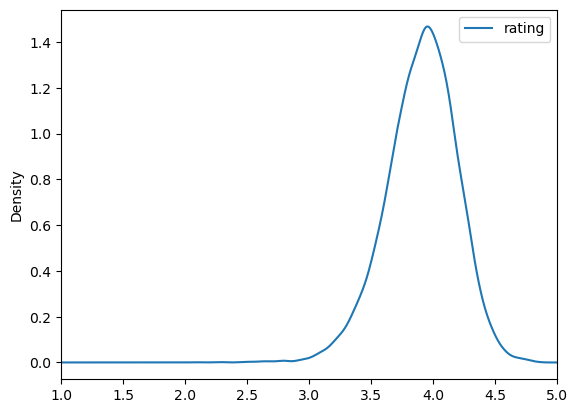

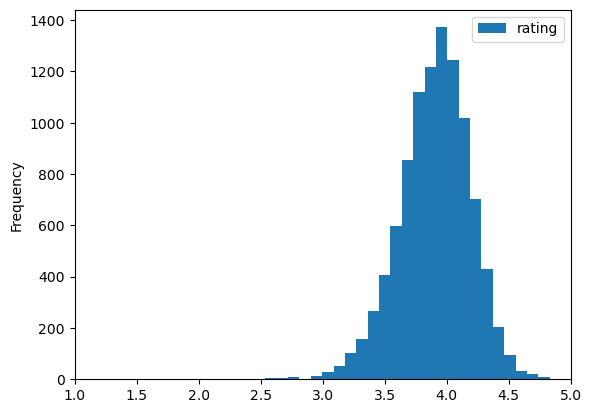

In [55]:
average_ratings.plot.density(xlim=(1, 5))

average_ratings.plot.hist(bins=30, xlim=(1, 5))

In [56]:
url = "https://datascience.quantecon.org/assets/data/airline_performance_dec16.csv.zip"
air_perf = pd.read_csv(url)[["CRSDepTime", "Carrier", "CarrierDelay", "ArrDelay"]]
air_perf.info()
air_perf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460949 entries, 0 to 460948
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CRSDepTime    460949 non-null  object 
 1   Carrier       460949 non-null  object 
 2   CarrierDelay  460949 non-null  float64
 3   ArrDelay      452229 non-null  float64
dtypes: float64(2), object(2)
memory usage: 14.1+ MB


,CRSDepTime,Carrier,CarrierDelay,ArrDelay
0,2016-12-18 15:58:00,AA,0.0,20.0
1,2016-12-19 15:58:00,AA,0.0,20.0
2,2016-12-20 15:58:00,AA,0.0,-3.0
3,2016-12-21 15:58:00,AA,0.0,-10.0
4,2016-12-22 15:58:00,AA,0.0,-8.0


In [57]:
avg_delays = (
    air_perf
    .pivot_table(index="Carrier", values="CarrierDelay", aggfunc="mean")
    .sort_values("CarrierDelay")
    .nlargest(10, "CarrierDelay")
)
avg_delays

,CarrierDelay
Carrier,
F9,7.856566
EV,7.125663
OO,6.705469
B6,5.588006
DL,4.674957
HA,4.577753
UA,4.368148
NK,4.166264
AA,4.073358


In [58]:
url = "https://datascience.quantecon.org/assets/data/airline_carrier_codes.csv.zip"
carrier_code = pd.read_csv(url)
carrier_code.tail()

,Code,Description
1884,ZW,Air Wisconsin Airlines Corp (1994 - )
1885,ZX,Airbc Ltd. (1990 - 2000)
1886,ZX,Air Georgian (2002 - )
1887,ZY,Atlantic Gulf Airlines (1985 - 1986)
1888,ZYZ,Skyway Aviation Inc. (1960 - 2002)


In [59]:
avg_delays_w_code = pd.merge(avg_delays,carrier_code, left_on="Carrier", right_on="Code")
avg_delays_w_code.sort_values("CarrierDelay", ascending=False)

,CarrierDelay,Code,Description
0,7.856566,F9,Frontier Airlines Inc. (1994 - )
1,7.125663,EV,ExpressJet Airlines Inc. (2012 - )
2,7.125663,EV,Atlantic Southeast Airlines (1993 - 2011)
3,6.705469,OO,SkyWest Airlines Inc. (2003 - )
4,5.588006,B6,JetBlue Airways (2000 - )
5,4.674957,DL,Delta Air Lines Inc. (1960 - )
6,4.577753,HA,Hawaiian Airlines Inc. (1960 - )
7,4.368148,UA,United Air Lines Inc. (1960 - )
8,4.166264,NK,Spirit Air Lines (1992 - )
9,4.073358,AA,American Airlines Inc. (1960 - )


In [60]:
dfL = pd.DataFrame(
    {"Key": ["A", "B", "A", "C"], "C1":[1, 2, 3, 4], "C2": [10, 20, 30, 40]},
    index=["L1", "L2", "L3", "L4"]
)[["Key", "C1", "C2"]]

print("This is dfL: ")
display(dfL)

dfR = pd.DataFrame(
    {"Key": ["A", "B", "C", "D"], "C3": [100, 200, 300, 400]},
    index=["R1", "R2", "R3", "R4"]
)[["Key", "C3"]]

print("This is dfR:")
display(dfR)

This is dfL: 


,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


This is dfR:


,Key,C3
R1,A,100
R2,B,200
R3,C,300
R4,D,400


In [61]:
pd.concat([dfL, dfR], axis=0)

,Key,C1,C2,C3
L1,A,1.0,10.0,NaN
L2,B,2.0,20.0,NaN
L3,A,3.0,30.0,NaN
L4,C,4.0,40.0,NaN
R1,A,NaN,NaN,100.0
R2,B,NaN,NaN,200.0
R3,C,NaN,NaN,300.0
R4,D,NaN,NaN,400.0


In [62]:
pd.concat([dfL, dfR], axis=1)

,Key,C1,C2,Key,C3
L1,A,1.0,10.0,NaN,NaN
L2,B,2.0,20.0,NaN,NaN
L3,A,3.0,30.0,NaN,NaN
L4,C,4.0,40.0,NaN,NaN
R1,NaN,NaN,NaN,A,100.0
R2,NaN,NaN,NaN,B,200.0
R3,NaN,NaN,NaN,C,300.0
R4,NaN,NaN,NaN,D,400.0


In [63]:
pd.merge(dfL, dfR, on="Key")

,Key,C1,C2,C3
0,A,1,10,100
1,A,3,30,100
2,B,2,20,200
3,C,4,40,300


In [64]:
pd.merge(dfL, dfR, on="Key", how="right")

,Key,C1,C2,C3
0,A,1.0,10.0,100
1,A,3.0,30.0,100
2,B,2.0,20.0,200
3,C,4.0,40.0,300
4,D,NaN,NaN,400


In [65]:
#Exercise 5
pd.concat([dfL, dfR], axis=1)

,Key,C1,C2,Key,C3
L1,A,1.0,10.0,NaN,NaN
L2,B,2.0,20.0,NaN,NaN
L3,A,3.0,30.0,NaN,NaN
L4,C,4.0,40.0,NaN,NaN
R1,NaN,NaN,NaN,A,100.0
R2,NaN,NaN,NaN,B,200.0
R3,NaN,NaN,NaN,C,300.0
R4,NaN,NaN,NaN,D,400.0


In [66]:
#The colums are the same just organized differerntly and None of the NAN gets introduced. 

In [67]:
#Exercise 6 
pd.concat([dfL, dfL], axis=0)

,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


In [68]:
pd.concat([dfR, dfR], axis=1)

,Key,C3,Key,C3
R1,A,100,A,100
R2,B,200,B,200
R3,C,300,C,300
R4,D,400,D,400


In [69]:
#The list contain the same data just organized differently. With some NaN introduced. C3

In [70]:
#Exercise 7 
pd.merge(dfL, dfR, how="right")

,Key,C1,C2,C3
0,A,1.0,10.0,100
1,A,3.0,30.0,100
2,B,2.0,20.0,200
3,C,4.0,40.0,300
4,D,NaN,NaN,400


In [71]:
# I don't see how it has more rows. 

In [72]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
C = np.arange(1, 7, dtype=float)
C[[3, 5]] = np.nan
df = pd.DataFrame({
    "A" : [1, 1, 1, 2, 2, 2],
    "B" : [1, 1, 2, 2, 1, 1],
    "C": C,
})
df

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [74]:
gbA = df.groupby("A")

In [75]:
type(gbA)

pandas.core.groupby.generic.DataFrameGroupBy

In [76]:
gbA.get_group(1)

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0


In [77]:
gbA.get_group(2)

,A,B,C
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [79]:
#Exercise 1
gbA.count()


,B,C
A,,
1,3,3
2,3,1


In [82]:
#Exercise 2 
df


,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [81]:
gbA.sum()

,B,C
A,,
1,4,6.0
2,4,5.0


In [84]:
gbA.sum(1)

,B,C
A,,
1,4,6.0
2,4,5.0


In [85]:
gbA.sum(2)

,B,C
A,,
1,4,6.0
2,4,5.0


In [86]:
gbA.sum(3)

,B,C
A,,
1,4,6.0
2,4,5.0


In [87]:
gbAB = df.groupby(["A", "B"])
type(gbAB)

pandas.core.groupby.generic.DataFrameGroupBy

In [88]:
gbAB.get_group((1, 1))

,A,B,C
0,1,1,1.0
1,1,1,2.0


In [89]:
gbAB.count()

C
A B   
1 1  2
  2  1
2 1  1
  2  0

In [90]:
def num_missing(df):
    "Return the number of missing items in each column of df"
    return df.isnull().sum()

In [91]:
num_missing(df)

A    0
B    0
C    2
dtype: int64

In [92]:
gbA.agg(num_missing)

,B,C
A,,
1,0,0
2,0,2


In [93]:
df

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [94]:
def smallest_by_b(df):
    return df.nsmallest(2, "B")

In [95]:
gbA.apply(smallest_by_b)

A  B    C
A             
1 0  1  1  1.0
  1  1  1  2.0
2 4  2  1  5.0
  5  2  1  NaN

In [96]:
#Exercise 3 

In [97]:
df2 = df.copy()
df2["Date"] = pd.date_range(
    start=pd.datetime.today().strftime("%m/%d/%Y"),
    freq="BQ",
    periods=df.shape[0]
)
df2 = df2.set_index("A")
df2

C:\Users\Danie\AppData\Local\Temp\ipykernel_2612\2961039157.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start=pd.datetime.today().strftime("%m/%d/%Y"),


,B,C,Date
A,,,
1,1,1.0,2023-12-29
1,1,2.0,2024-03-29
1,2,3.0,2024-06-28
2,2,NaN,2024-09-30
2,1,5.0,2024-12-31
2,1,NaN,2025-03-31


In [98]:
df2.groupby(pd.Grouper(key="Date", freq="A")).count()

,B,C
Date,,
2023-12-31,1,1
2024-12-31,4,3
2025-12-31,1,0


In [99]:
df2.groupby(pd.Grouper(level="A")).count()

,B,C,Date
A,,,
1,3,3,3
2,3,1,3


In [100]:
df2.groupby([pd.Grouper(key="Date", freq="A"), pd.Grouper(level="A")]).count()

B  C
Date       A      
2023-12-31 1  1  1
2024-12-31 1  2  2
           2  2  1
2025-12-31 2  1  0

In [101]:
df2.groupby([pd.Grouper(key="Date", freq="A"), "B"]).count()

C
Date       B   
2023-12-31 1  1
2024-12-31 1  2
           2  1
2025-12-31 1  0

In [102]:
url = "https://datascience.quantecon.org/assets/data/airline_performance_dec16.csv.zip"
air_dec = pd.read_csv(url, parse_dates = ['Date'])

In [109]:
weekly_delays = (
    air_dec
    .groupby([pd.Grouper(key="Date", freq="W"), "Carrier"])
    ["ArrDelay"]               # extract one column
    .mean()                    # take average
    .unstack(level="Carrier")  # Flip carrier up as column names
)
weekly_delays

Carrier,AA,AS,B6,DL,EV,F9,HA,NK,OO,UA,VX,WN
Date,,,,,,,,,,,,
2016-12-04,-1.714887,2.724273,-2.894269,-5.088351,8.655332,-2.894212,-0.558282,5.468909,2.749573,5.564496,-2.121821,-1.663695
2016-12-11,1.148833,12.052031,5.795062,2.507745,13.220673,4.578861,2.054302,8.713755,15.429660,4.094176,12.080938,1.865933
2016-12-18,16.357561,7.643767,34.608356,18.000000,23.876622,45.014888,9.388889,22.857899,30.901639,22.398130,33.651128,18.373400
2016-12-25,6.364513,2.719699,5.586836,-0.916113,6.857143,54.084959,5.075747,10.443369,15.004780,5.332474,17.286917,10.197685
2017-01-01,2.321836,1.226662,10.661577,2.048116,6.800898,8.280298,6.970016,8.361123,8.971083,0.061786,1.349580,5.213019


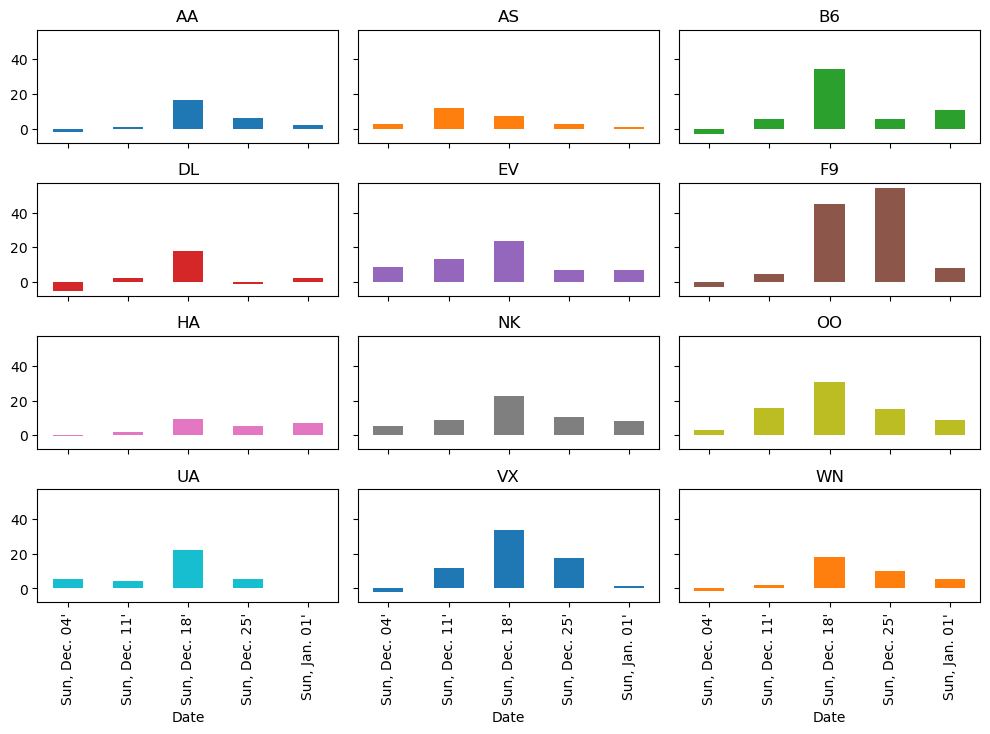

In [110]:
axs = weekly_delays.plot.bar(
    figsize=(10, 8), subplots=True, legend=False, sharex=True,
    sharey=True, layout=(4, 3), grid=False
)

axs[0,0].get_figure().tight_layout()
for ax in axs[-1, :]:
    ax.set_xticklabels(weekly_delays.index.strftime("%a, %b. %d'"))

In [111]:
delay_cols = [
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay'
]

In [112]:
pre_christmas = air_dec.loc[
    (air_dec["Date"] >= "2016-12-12") & (air_dec["Date"] <= "2016-12-18")
]

# custom agg function
def positive(df):
    return (df > 0).sum()

delay_totals = pre_christmas.groupby("Carrier")[delay_cols].agg(["sum", "mean", positive])
delay_totals

CarrierDelay                     WeatherDelay                     \
                 sum       mean positive          sum      mean positive   
Carrier                                                                    
AA          105732.0   6.258553     2922      21820.0  1.291583      456   
AS            8762.0   2.691032      250       3219.0  0.988636       61   
B6           49421.0   9.031615     1575       9894.0  1.808114      112   
DL          151188.0   8.864212     2878      39145.0  2.295087      783   
EV           87408.0   9.939504     1375       3824.0  0.434842       76   
F9           19568.0  10.430704      361       6198.0  3.303838       57   
HA            7199.0   5.034266      218       3650.0  2.552448      145   
NK           14735.0   5.294646      452       2240.0  0.804887       56   
OO          120307.0  10.439691     1378      26349.0  2.286446      308   
UA           66693.0   6.312636     1851      31602.0  2.991197      521   
VX            8048.0   5.608362      246       3807.0  2.652962      126   
WN          123882.0   4.873790     5393      23516.0  0.925171      328   

        NASDelay                     SecurityDelay                     \
             sum       mean positive           sum      mean positive   
Carrier                                                                 
AA       77279.0   4.574346     3159         721.0  0.042678       35   
AS       16344.0   5.019656      614         163.0  0.050061       10   
B6       38741.0   7.079861     1326         672.0  0.122807       30   
DL       75110.0   4.403729     2605         107.0  0.006273        2   
EV       49703.0   5.651922     1580           0.0  0.000000        0   
F9       22459.0  11.971748      493           0.0  0.000000        0   
HA          86.0   0.060140        4          35.0  0.024476        3   
NK       30361.0  10.909450      840          50.0  0.017966        5   
OO       54141.0   4.698108     2289         171.0  0.014839       12   
UA       74992.0   7.098154     2065           0.0  0.000000        0   
VX       12619.0   8.793728      224          73.0  0.050871        4   
WN       78645.0   3.094067     4247         252.0  0.009914       18   

        LateAircraftDelay                      
                      sum       mean positive  
Carrier                                        
AA               141249.0   8.360897     2574  
AS                13599.0   4.176597      271  
B6               100811.0  18.423063     1433  
DL               122896.0   7.205441     2289  
EV                89773.0  10.208438     1568  
F9                32236.0  17.183369      316  
HA                 4024.0   2.813986      189  
NK                22247.0   7.993891      372  
OO               166102.0  14.413572     2459  
UA               118728.0  11.237861     1696  
VX                25242.0  17.590244      331  
WN               285073.0  11.215399     6472

In [114]:
reshaped_delays = (
    delay_totals
    .stack()             
    .T                   
    .swaplevel(axis=1)   
    .sort_index(axis=1)  
)
reshaped_delays

mean                                            \
Carrier                  AA        AS         B6        DL         EV   
CarrierDelay       6.258553  2.691032   9.031615  8.864212   9.939504   
WeatherDelay       1.291583  0.988636   1.808114  2.295087   0.434842   
NASDelay           4.574346  5.019656   7.079861  4.403729   5.651922   
SecurityDelay      0.042678  0.050061   0.122807  0.006273   0.000000   
LateAircraftDelay  8.360897  4.176597  18.423063  7.205441  10.208438   

                                                                         ...  \
Carrier                   F9        HA         NK         OO         UA  ...   
CarrierDelay       10.430704  5.034266   5.294646  10.439691   6.312636  ...   
WeatherDelay        3.303838  2.552448   0.804887   2.286446   2.991197  ...   
NASDelay           11.971748  0.060140  10.909450   4.698108   7.098154  ...   
SecurityDelay       0.000000  0.024476   0.017966   0.014839   0.000000  ...   
LateAircraftDelay  17.183369  2.813986   7.993891  14.413572  11.237861  ...   

                        sum                                               \
Carrier                  B6        DL       EV       F9      HA       NK   
CarrierDelay        49421.0  151188.0  87408.0  19568.0  7199.0  14735.0   
WeatherDelay         9894.0   39145.0   3824.0   6198.0  3650.0   2240.0   
NASDelay            38741.0   75110.0  49703.0  22459.0    86.0  30361.0   
SecurityDelay         672.0     107.0      0.0      0.0    35.0     50.0   
LateAircraftDelay  100811.0  122896.0  89773.0  32236.0  4024.0  22247.0   

                                                          
Carrier                  OO        UA       VX        WN  
CarrierDelay       120307.0   66693.0   8048.0  123882.0  
WeatherDelay        26349.0   31602.0   3807.0   23516.0  
NASDelay            54141.0   74992.0  12619.0   78645.0  
SecurityDelay         171.0       0.0     73.0     252.0  
LateAircraftDelay  166102.0  118728.0  25242.0  285073.0  

[5 rows x 36 columns]

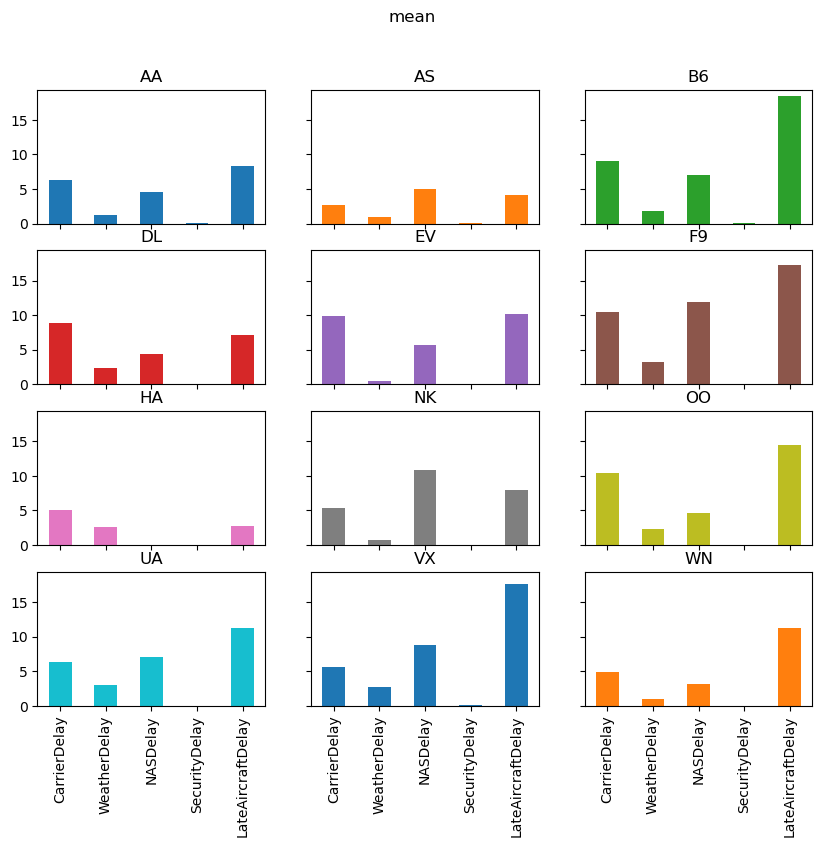

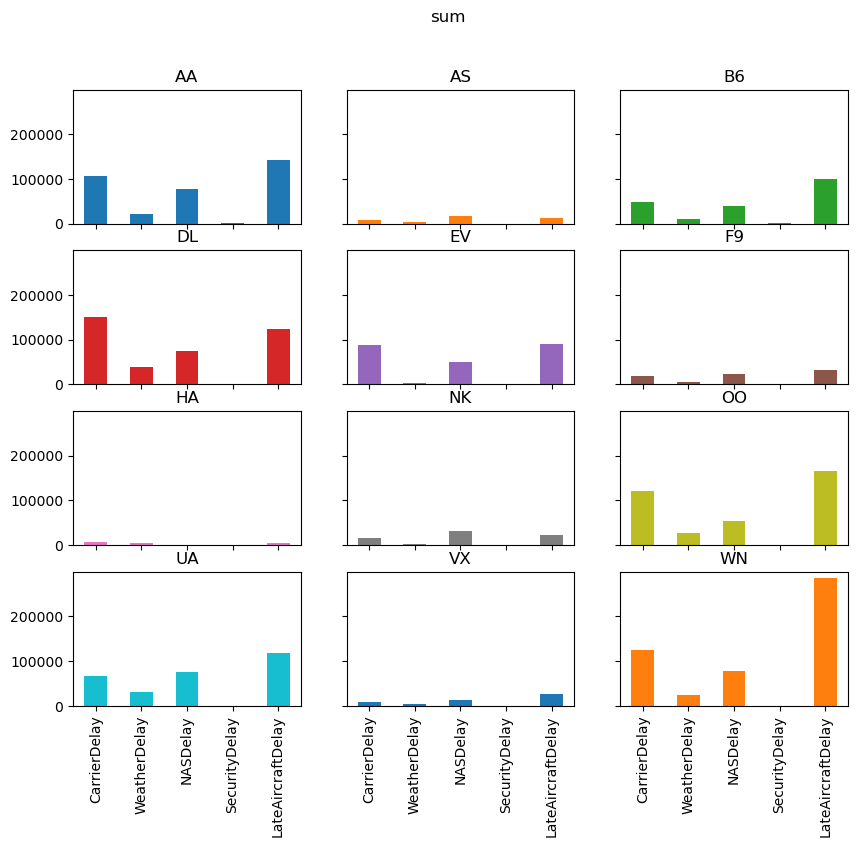

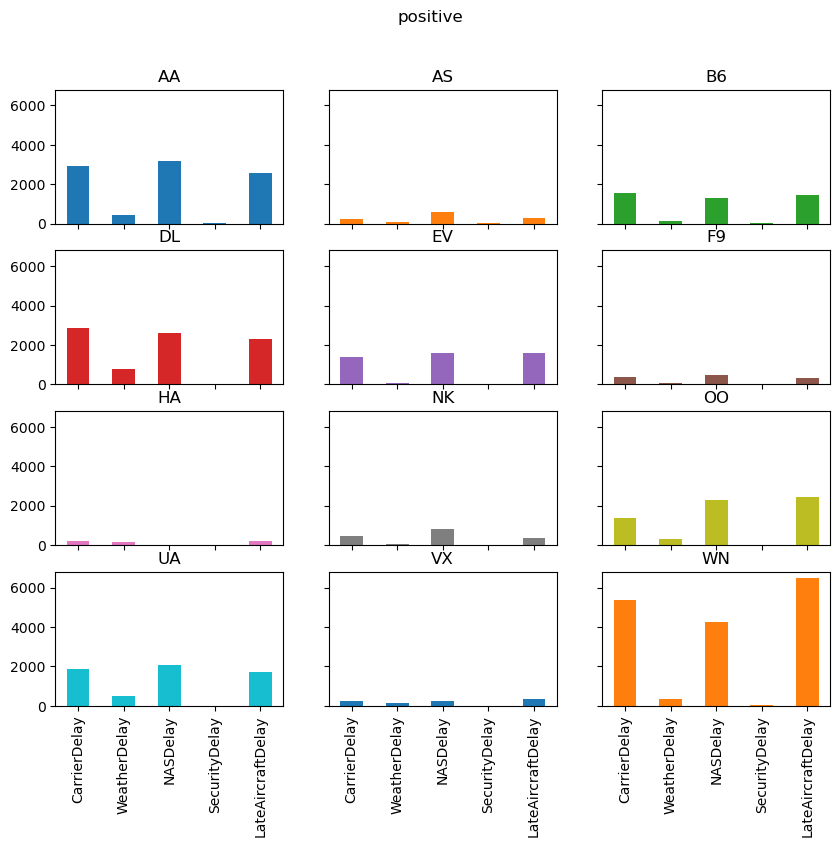

In [115]:
for agg in ["mean", "sum", "positive"]:
    axs = reshaped_delays[agg].plot(
        kind="bar", subplots=True, layout=(4, 3), figsize=(10, 8), legend=False,
        sharex=True, sharey=True
    )
    fig = axs[0, 0].get_figure()
    fig.suptitle(agg)
#     fig.tight_layout();

In [116]:
#Exercise 4 
#B9
#DL
#WN

In [117]:
def mean_delay_plot(df, freq, figsize=(10, 8)):
    """
    Make a bar chart of average flight delays for each carrier at
    a given frequency.
    """
    mean_delays = (
        df
        .groupby([pd.Grouper(key="Date", freq=freq), "Carrier"])
        ["ArrDelay"]               # extract one column
        .mean()                    # take average
        .unstack(level="Carrier")  # Flip carrier up as column names
    )

    # plot
    axs = mean_delays.plot.bar(
        figsize=figsize, subplots=True, legend=False, sharex=True,
        sharey=True, layout=(4, 3), grid=False
    )

    # tweak spacing between subplots and x-axis labels
    axs[0, 0].get_figure().tight_layout()
    for ax in axs[-1, :]:
        ax.set_xticklabels(mean_delays.index.strftime("%a, %b. %d'"))

    # return the axes in case we want to further tweak the plot outside the function
    return axs


def delay_type_plot(df, start, end):
    """
    Make bar charts for total minutes, average minutes, and number of
    occurrences for each delay type, for all flights that were scheduled
    between `start` date and `end` date
    """
    sub_df = df.loc[
        (df["Date"] >= start) & (df["Date"] <= end)
    ]

    def positive(df):
        return (df > 0).sum()

    aggs = sub_df.groupby("Carrier")[delay_cols].agg(["sum", "mean", positive])

    reshaped = aggs.stack().T.swaplevel(axis=1).sort_index(axis=1)

    for agg in ["mean", "sum", "positive"]:
        axs = reshaped[agg].plot(
            kind="bar", subplots=True, layout=(4, 3), figsize=(10, 8), legend=False,
            sharex=True, sharey=True
        )
        fig = axs[0, 0].get_figure()
        fig.suptitle(agg)
#         fig.tight_layout();

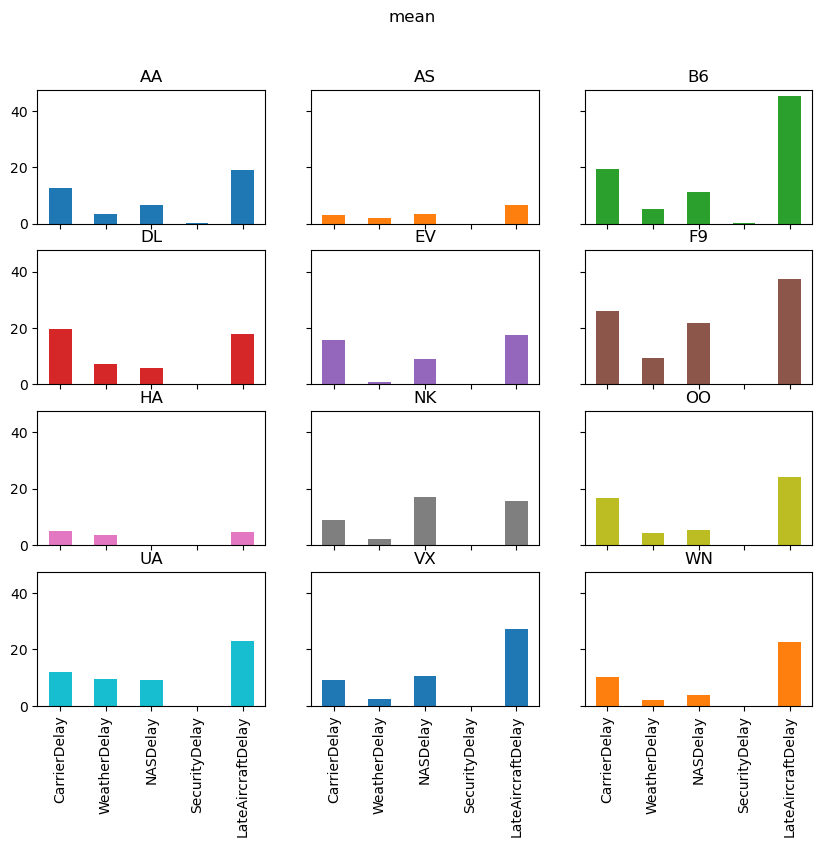

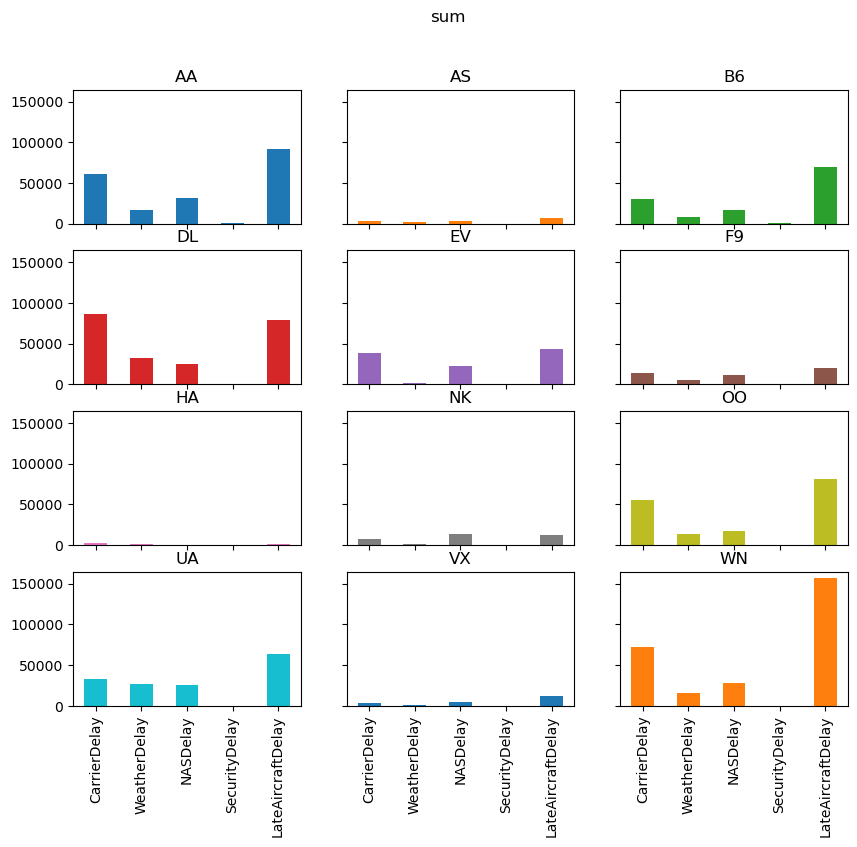

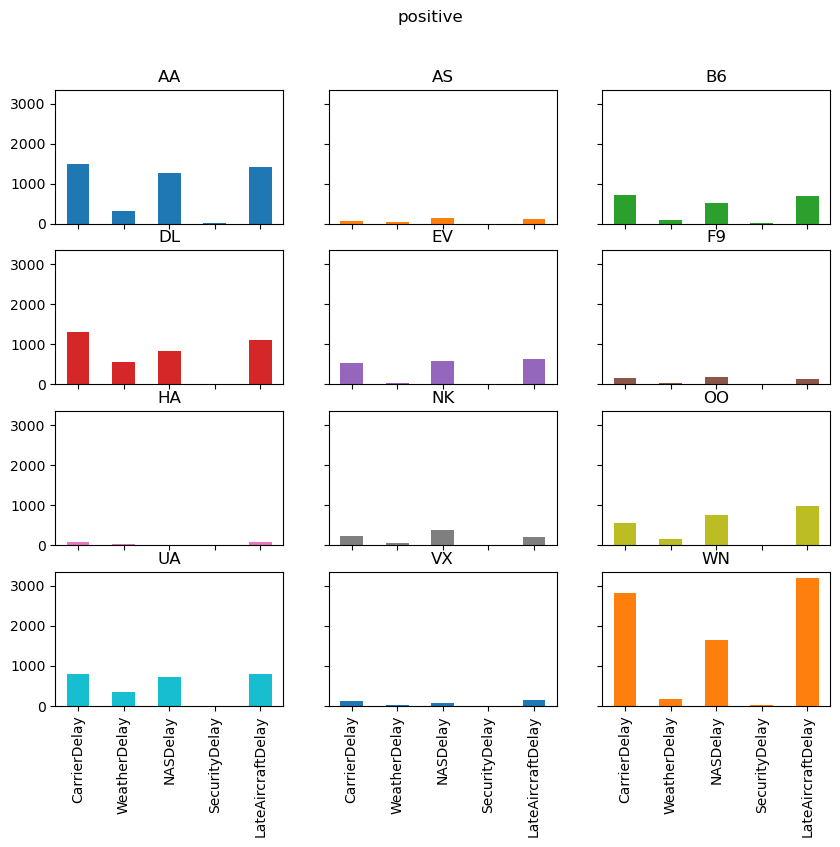

In [118]:
delay_type_plot(air_dec, "12-17-16", "12-18-16")

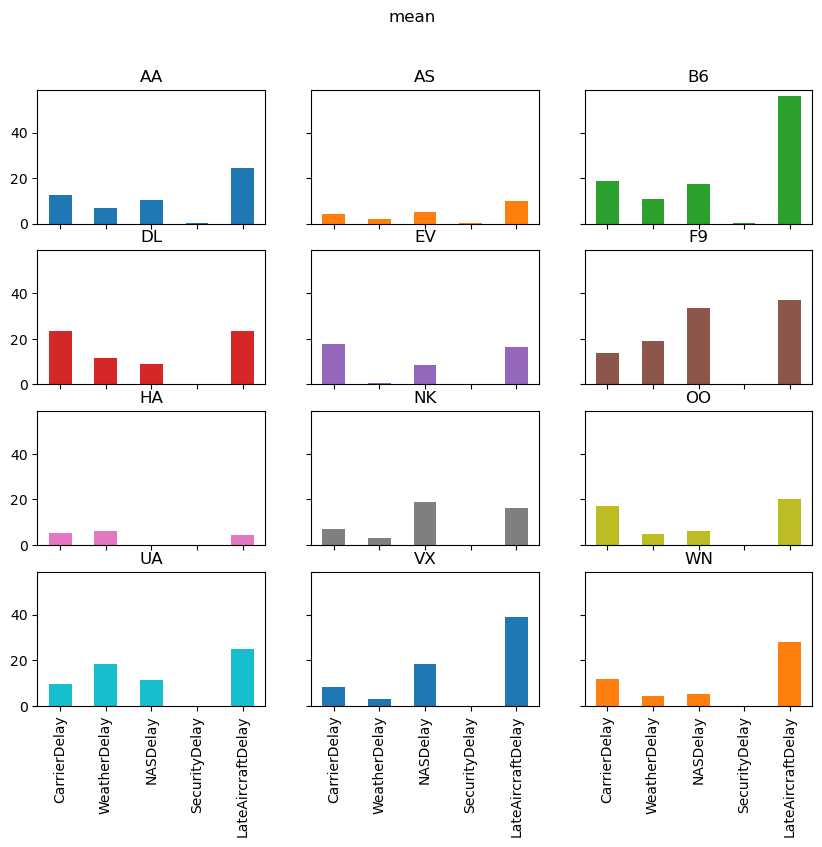

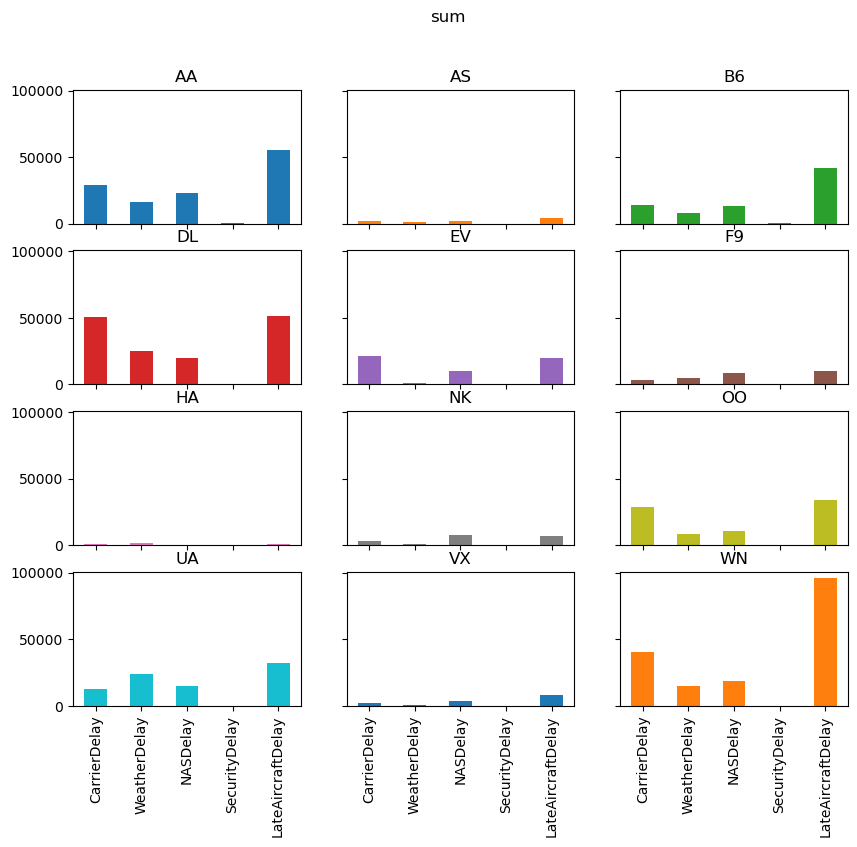

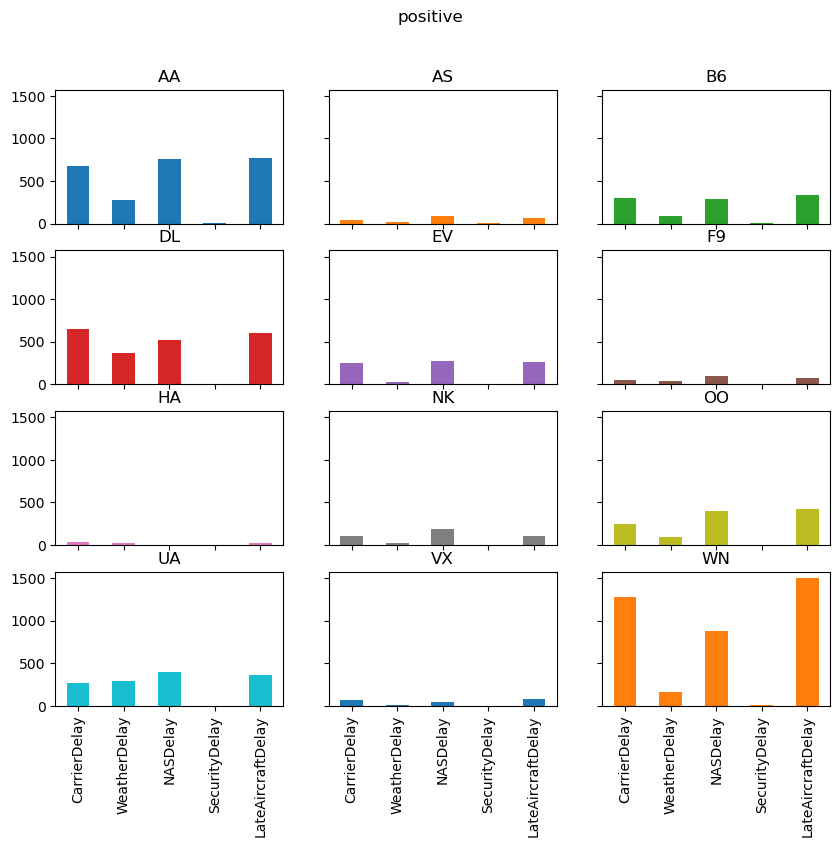

In [119]:
delay_type_plot(air_dec, "12-17-16", "12-17-16")

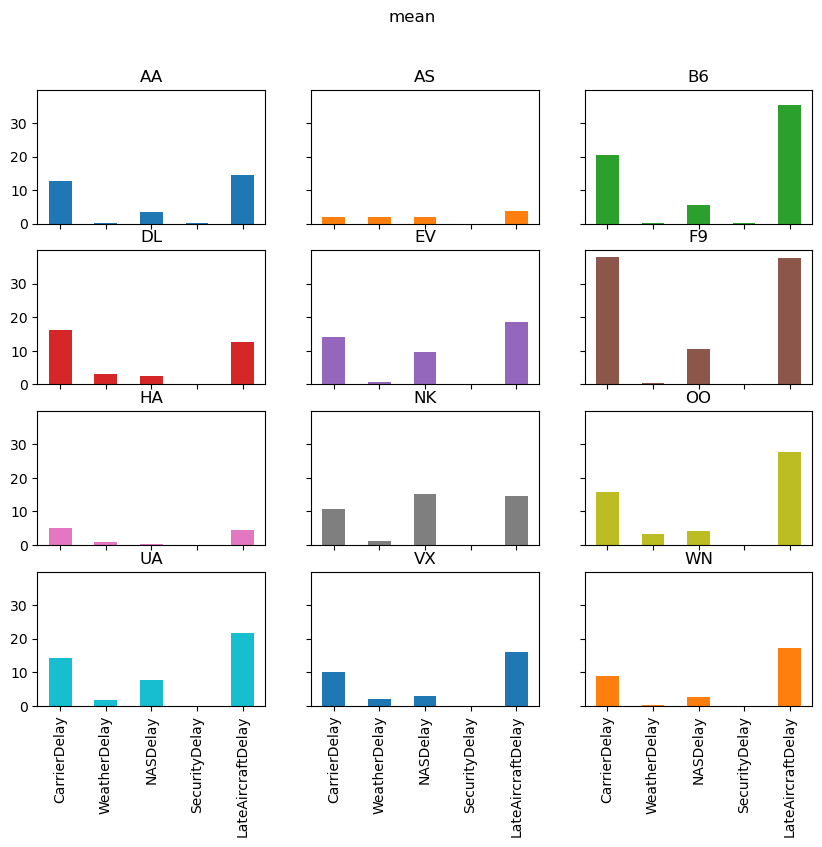

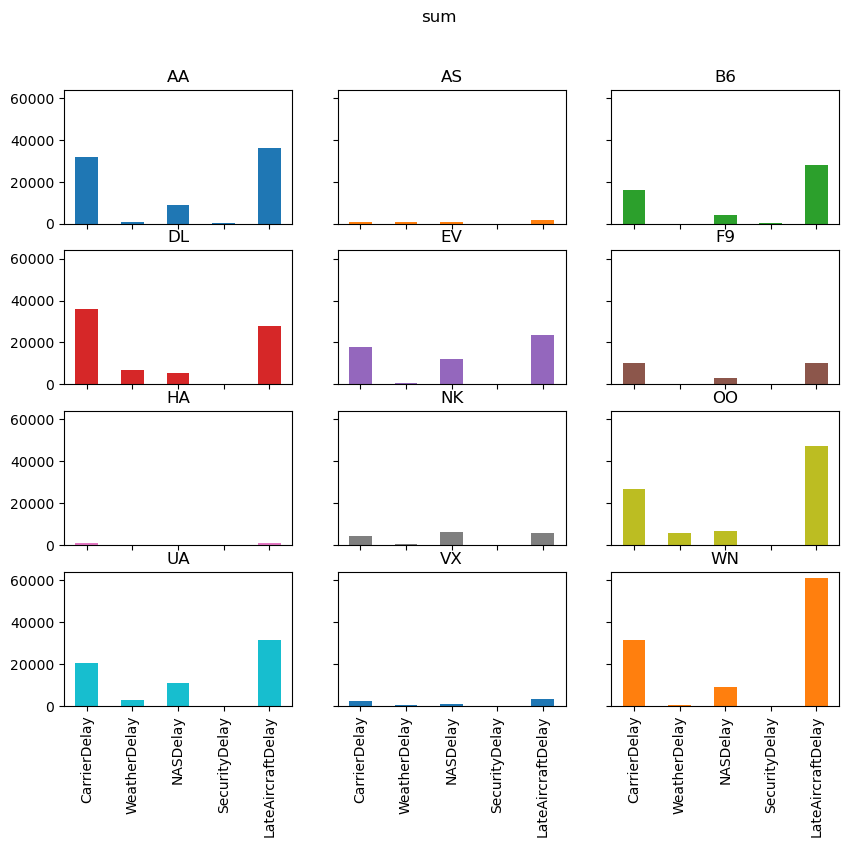

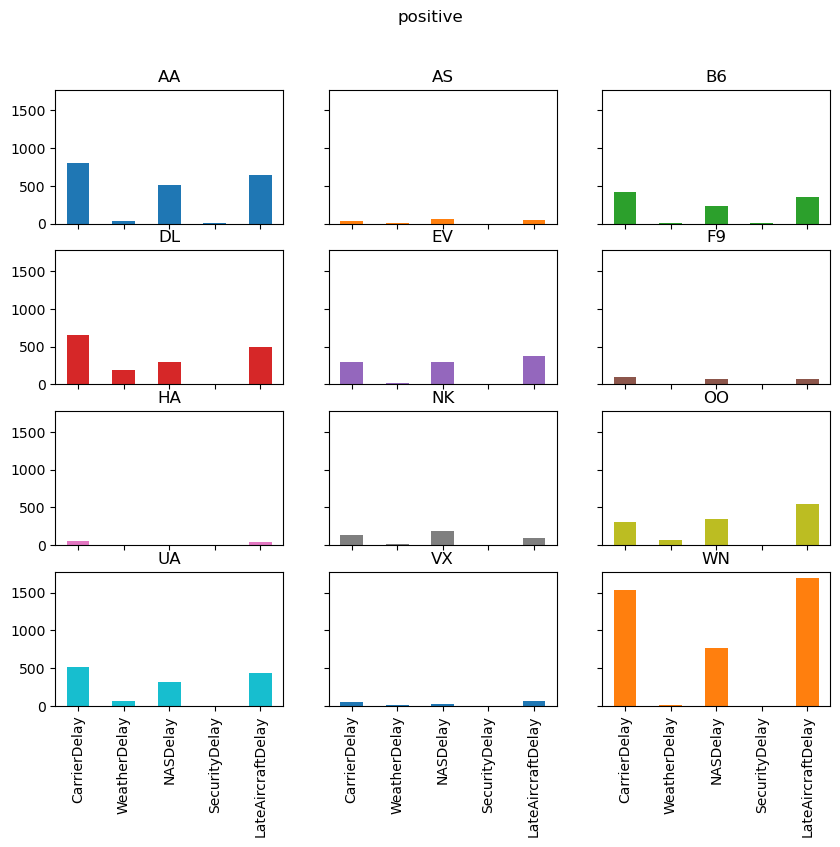

In [120]:
delay_type_plot(air_dec, "12-18-16", "12-18-16")

In [121]:
#Exercise 5 
call mean_delay_plot here
call delay_type_plot here

SyntaxError: invalid syntax (1601633128.py, line 2)